In [11]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap


In [12]:
#import the dataset
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


#split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [13]:
#implementing the pca
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_


In [14]:
#fit logistic regression to the training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

#predict the test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[1 1]
 [3 3]
 [2 2]
 [1 1]
 [2 2]
 [1 2]
 [1 1]
 [3 3]
 [2 2]
 [2 2]
 [3 3]
 [3 3]
 [1 1]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [3 3]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [3 3]
 [2 2]
 [2 2]
 [3 3]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[[16  0  0]
 [ 1 20  0]
 [ 0  0  8]]


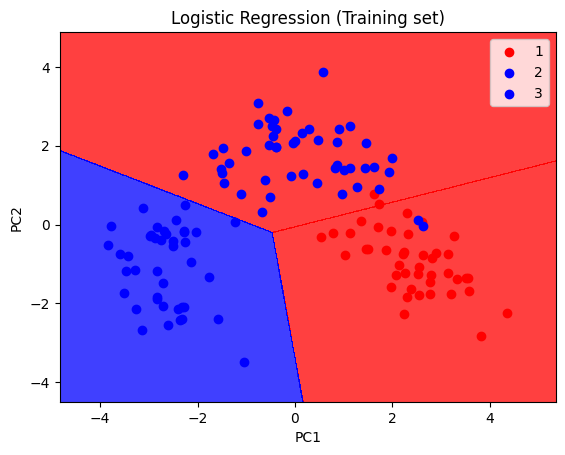

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


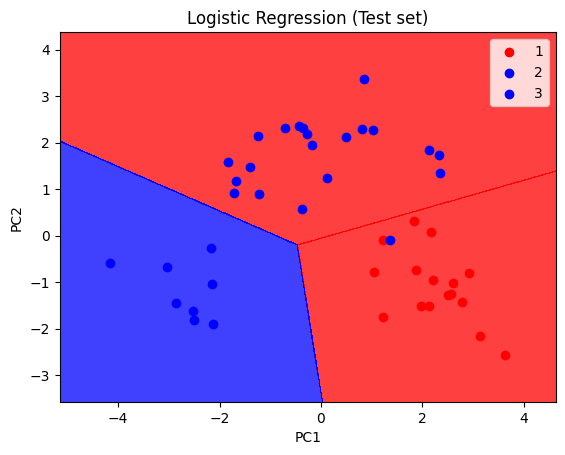

In [15]:
#making the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#visualising the training set results
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                        np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

#visualising the test set results
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                        np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


#principle component analysis
#standardize teh data
#obtain the eigen vectors and eigen values from the covariance matrix or correlation matrix, or perform SVD.
#sort eigen values in descending order and choose the top k eigenvectors that correspond to the k largest eigen values where k is the number of dimensions of the new feature subspace (k<=d).
#onstruct the projection matrix W from the selected k eigenvectors.
#transform the original dataset X via W to obtain a k-dimensional feature subspace Y.
#   
#Linear Discriminant Analysis
#dused as a dimensionality reduction technique in the pre-processing step for pattern classification and machine learning applications.
#has the goal to prject a dataset onto a lower dimensional space with good class-separability in order to avoid overfitting and also reduce computational cost.

#Lda differs from pca in that it is a supervised method, using known class labels.
#LDA differs because in addition to finding the component axes that maximize the variance of the data, it finds the axes that maximize the separation between multiple classes.

#The goal of LDA is to project a feature space (a dataset n-dimensional samples) onto a smaller subspace k (where k<=n-1) while maintaining the class-discriminatory information.

#Both PCA and LDA are linear transformation techniques. PCA is an unsupervised method, whereas LDA is a supervised method since it uses the class labels.
